## Assumption

According to Skiena's note, we could start our model with a linear model likes this:
$$P(Wins|\sim) = f(score,\ time\ left,\ field\ position)$$ where $\sim$ are the given observation.


### Logistic Regression

#### Motivation
Since we are going to decide whether a team is going to clear its bets, this might goes to a classification problem (**clear** and **not clear**). We could use **logistic regression** to decide what's the probability that team A is going to clear the bets.

#### Usage
```python
lg = sklearn.linear_model.LogisticRegression()
lg.fit(X, y) # X would be the collection of vectors of score, time_left, field_position
             # y would be a bunch of value that clear the bet or not
prob = predict(X_new) # get the probability
```

#### How we treat dataset

Each match would have 2 blocks of record (the other one is the counterpart)



In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [30]:
dat = pd.read_csv('data/201401-201403_baseline_cleandata.csv')

In [31]:
dat.describe()

,qtr,lefttime,score,yrdln,cover,season,week
count,17078.000000,17078.000000,17078.000000,17078.000000,17078.000000,17078.0,17078.000000
mean,2.573135,1714.640239,10.961061,50.000000,0.000000,2014.0,1.990046
std,1.122527,1053.513636,9.702795,25.652342,1.000029,0.0,0.818489
min,1.000000,0.000000,0.000000,1.000000,-1.000000,2014.0,1.000000
25%,2.000000,813.000000,3.000000,29.000000,-1.000000,2014.0,1.000000
50%,3.000000,1800.000000,10.000000,50.000000,0.000000,2014.0,2.000000
75%,4.000000,2603.000000,17.000000,71.000000,1.000000,2014.0,3.000000
max,5.000000,3941.000000,54.000000,99.000000,1.000000,2014.0,3.000000


In [32]:
train = dat[dat['week'] < 3]

In [33]:
test = dat[dat['week'] == 3]

In [34]:
lg = lm.LogisticRegression(penalty='l1')

In [38]:
lg.fit(train.loc[:,['lefttime', 'yrdln', 'score']], train.loc[:, 'cover'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
lg.classes_

array([-1.,  1.])

## Print the result on season 2014, week 1, match 1

In [47]:
# Create a series of dataset
demo = train[(train['week'] == 1) & (train['team'] == 'SEA')]
prob = lg.predict_proba(demo.loc[:,['lefttime', 'yrdln', 'score']])
cover_prob = [p[1] for p in prob]

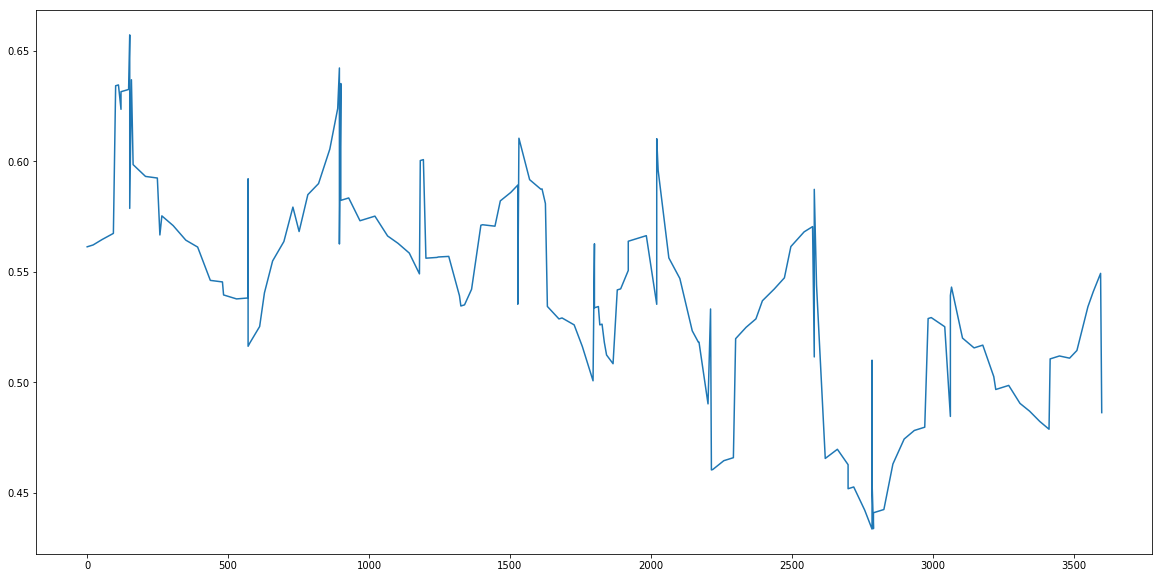

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(demo.lefttime, cover_prob)
plt.show()